In [1]:
pip install tensorflow opencv-python pillow pytesseract


   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/385.0 MB 7.6 MB/s eta 0:00:51
   ---------------------------------------- 3.1/385.0 MB 7.4 MB/s eta 0:00:52
   ---------------------------------------- 4.5/385.0 MB 7.4 MB/s eta 0:00:52
    --------------------------------------- 6.0/385.0 MB 7.4 MB/s eta 0:00:52
    --------------------------------------- 7.6/385.0 MB 7.3 MB/s eta 0:00:52
    --------------------------------------- 9.2/385.0 MB 7.4 MB/s eta 0:00:51
   - -------------------------------------- 10.7/385.0 MB 7.4 MB/s eta 0:00:51
   - -------------------------------------- 12.3/385.0 MB 7.3 MB/s eta 0:00:51
   - -------------------------------------- 13.6/385.0 MB 7.4 MB/s eta 0:00:51
   - -------------------------------------- 15.2/385.0 MB 7.4 MB/s eta 0:00:51
   - -------------------------------------- 16.8/385.0 MB 7.3 MB/s eta 0:00:51
   - -------------------------------------- 18.4/385.0 MB 7.4 MB/s

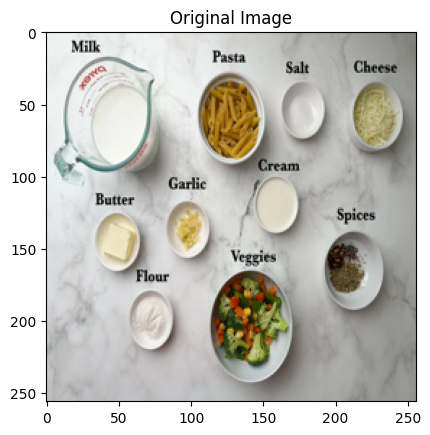

Preprocessed Image Shape: (1, 128, 128, 3)


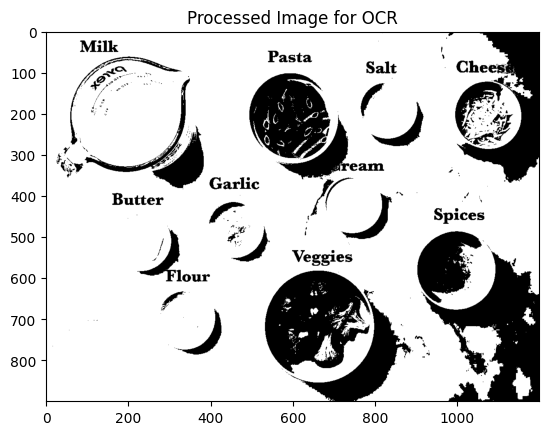

Recognized Text from Image:
 Garlic

Butter ff” fr ~
/ « ) ' ~
’ Veggies

lour
f

y,

e



In [5]:
import cv2
import pytesseract
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256)) 
    return img

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    return img_array

def perform_ocr(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    _, binary_img = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    text = pytesseract.image_to_string(binary_img)
    
    
    plt.imshow(binary_img, cmap='gray')
    plt.title("Processed Image for OCR")
    plt.show()
    
    return text

sample_image_path = 'white-sauce-pasta-ingredients.webp'
original_image = load_image(sample_image_path)
plt.imshow(original_image)
plt.title("Original Image")
plt.show()


preprocessed_image = preprocess_image(sample_image_path)
print("Preprocessed Image Shape:", preprocessed_image.shape)


recognized_text = perform_ocr(sample_image_path)
print("Recognized Text from Image:\n", recognized_text)
